# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

__Número de grupo: 5__

__Nombres de los estudiantes: Pablo Martínez y Jorge Villacorta__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

phones = pd.read_csv('mobile_phones.csv')
phones.loc[phones['price_range'] == 0, 'price_range'] = 'low cost'
phones.loc[phones['price_range'] == 1, 'price_range'] = 'medium cost'
phones.loc[phones['price_range'] == 2, 'price_range'] = 'high cost'
phones.loc[phones['price_range'] == 3, 'price_range'] = 'very high cost'
phones

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,medium cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,medium cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,low cost
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,high cost
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,very high cost
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,low cost


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

<AxesSubplot:ylabel='price_range'>

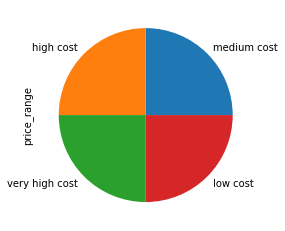

In [3]:
phones['price_range'].value_counts().plot.pie()

Como podemos ver en el diagrama, las clases estan equilibradas ya que parece que hay mas o menos el mismo numeros de elementos de cada clase, lo cual nos facilitará bastante más el añadir nuevos moviles a la tabla en el futuro.

In [8]:
c1 = phones.groupby("price_range").corr(phones['n_cores'])
print(c1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
c2 = phones['price_range'].corr(phones['int_memory'])
print(c2)

In [ ]:
c3 = phones['price_range'].corr(phones['ram'])
print(c3)

Podemos observar que el coeficiente de correlación se acerca bastante a 1, de hecho, si observamos la tabla siguiente, podemos observar que es la que mas se acerca a 1, con lo cual 'ram' es la variable que mas correlada está con 'price_range' y sera la que mejor nos ayude a clasificar el problema

In [ ]:
phones.corr()

Viendo la tabla de la correlación entre variables, podemos observar que las variables que mas correladas estan  con "price_range" son  "ram" (0.91), "px_height" (0.148), "px_width" (0.165), y "battery_power" (0.2), con lo cual usaremos  estas variables para clasificar el "price_range" de un movil en concreto. Realmente la única variable que realmente nos va ayudar en este caso es "ram", ya que las otras tres variables con el coeficiente mas alto se acercan a 0 (0.148, 0.165, 0.2), con lo cual no son muy buenas variables a la hora de clasificar el problema. También podemos observar en algunas variables un coeficiente de correlación negativo, como en "touch_screen", "phone_wt" y "clock_speed", lo que nos indica que se mueven en direcciones opuestas a la variable "price_range". Por ejemplo, cuanto MÁS pesa un movil, MENOR será su precio.


In [ ]:
plt.scatter(phones['price_range'], phones['ram'])
plt.show()

In [ ]:
plt.scatter(phones['price_range'], phones['px_height'])
plt.show()

In [ ]:
plt.scatter(phones['price_range'], phones['px_width'])
plt.show()

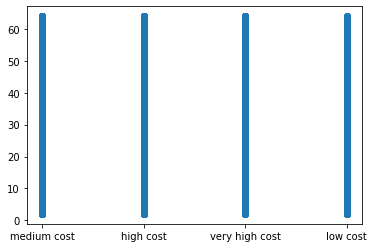

In [5]:
plt.scatter(phones['price_range'], phones['int_memory'])
plt.show()

Veamos la correlación entre las demás variables en función del price_range con las siguientes distribuciones bivariadas:

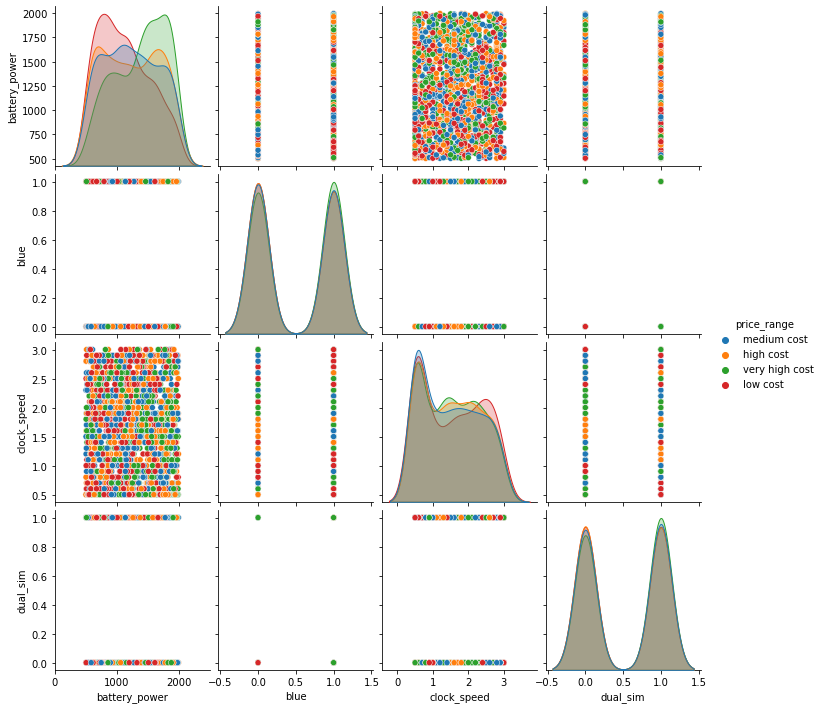

In [9]:
var = phones[['battery_power','blue','clock_speed','dual_sim','price_range']]

sns.pairplot(var, hue="price_range")

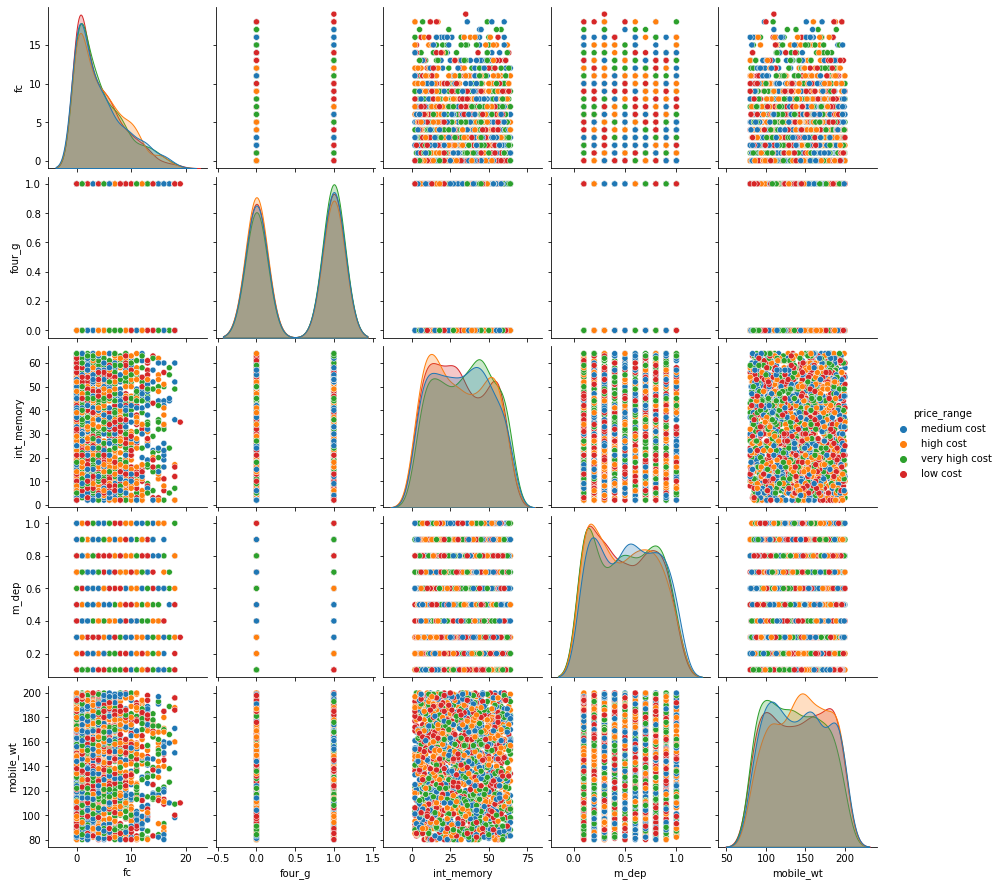

In [13]:
var = phones[['fc','four_g','int_memory','m_dep','mobile_wt','price_range']]

sns.pairplot(var, hue="price_range")

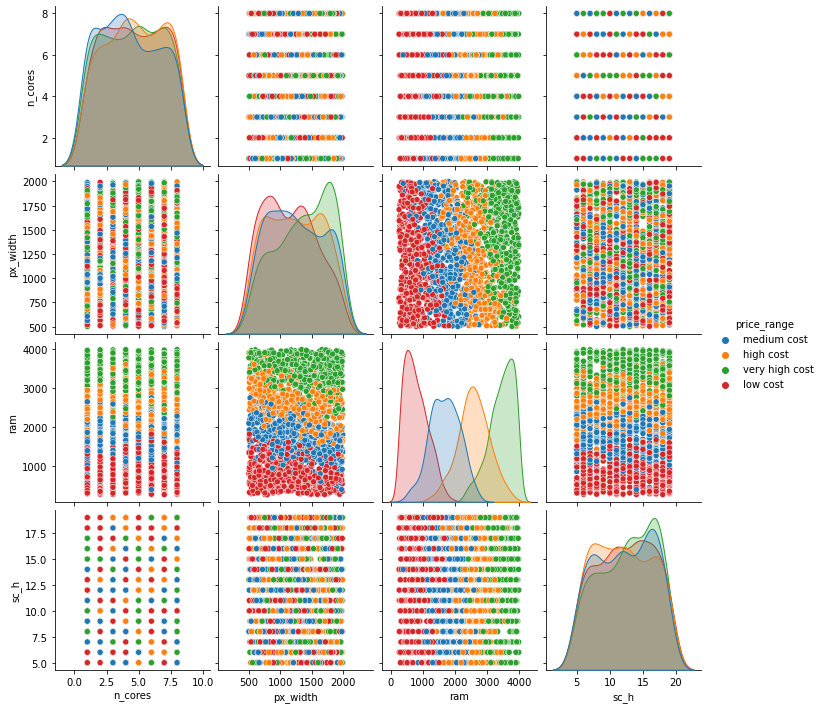

In [11]:
var = phones[['n_cores','px_width','ram','sc_h','price_range']]

sns.pairplot(var, hue="price_range")

Podemos ver en el diagrama de price_range con ram como estan claramente definidas las distintas clases de 'price_range' en funcion de su ram, y esto nos confirma que la variable 'ram' es la variable que mejor nos va a ayudar a clasificar el problema, como habiamos visto con su coeficiente de correlación (0,91). Tambien podemos observar que n_cores, sc_h y px_width estan bastante correladas con ram a la hora de separar el problema.

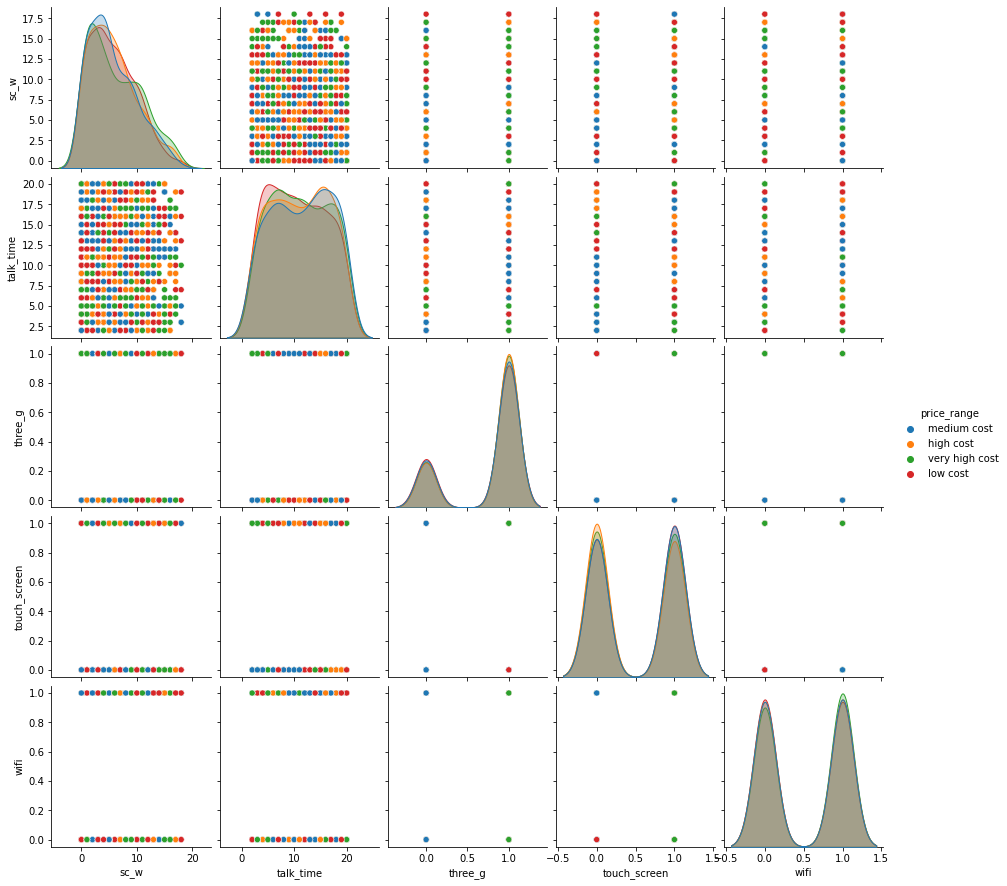

In [14]:
var = phones[['sc_w','talk_time','three_g','touch_screen','wifi','price_range']]

sns.pairplot(var, hue="price_range")

En los diferentes gráficos que se muestran arriba podemos ver como están distribuidas las clases según las variables. Podemos observar que hay variables que separan muy bien las diferentes clases respecto a la variable objetivo, como ram, ram y sc_h, ram y px_width, y ram y n_cores. Con el resto de variables no podemos asegurar que se separen las variables con precisión.

Dado que tenemos cuatro variables correlacionadas en cierta manera con price_range y 3 variables fuertemente correlacionadas entre si con respecto a la variable objetivo, puede ser factible el predecir un precio en función de estos valores.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Un árbol de decisión se encarga de hacer preguntas determinadas a las variables para conseguir tener los nodos más puros posibles, en cada nodo se pregunta por el valor de una variable y en función de esa pregunta separa. Para conseguir estos datos necesitamos el valor real de la variable por lo que no es necesario normalizar ya que no se le está dando más peso a ninguna variable en concreto. Para los arboles de decisión no es necesario normalizar los datos.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [48]:

#Creamos el array que solo contiene la variable a predecir (target)
target = phones['price_range']

#Creamos el array con los datos de entrenamiento (todas las variables menos el price_range) 
#y el array con las variables a predecir (price_range)
data = phones.loc[:, phones.columns != 'price_range']

#data = data.to_numpy().copy()
class_names_ph = list(phones["price_range"])


In [50]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

X = data.values
y = target.values


#Definimos dos vectores para poder guardar los datos según la profundidad
train_accuracy =[]
test_accuracy = []

splits = range (2,10)
for sp in splits:
    arbol = DecisionTreeClassifier(criterion = "entropy",min_samples_split = sp,random_state = 40)
    arbol.fit(X,y)
    
    scores = cross_validate(arbol, data, target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score'])) 

train_accuracy, test_accuracy
    


([1.0,
  0.998,
  0.9948333333333335,
  0.990888888888889,
  0.9868888888888888,
  0.9834444444444443,
  0.9793888888888891,
  0.9738888888888889],
 [0.853, 0.8535, 0.849, 0.8525, 0.8514999999999999, 0.851, 0.852, 0.852])

Podemos ver que la puntuación para test se mantiene bastante estable (una diferencia de 0,045 entre el mayor y menor valor -> min_samples_split = 3 y min_samples_split = 4), mientras que la precisión para el conjunto de entrenamiento disminuye ligeramente, como es previsible.

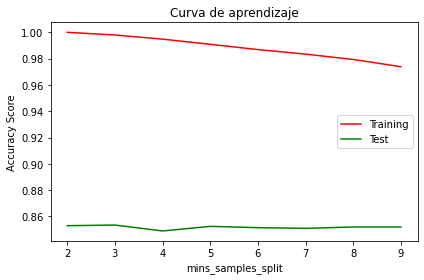

In [51]:
# Draw lines
plt.plot(max_depth, train_accuracy, color="r",  label="Training")
plt.plot(max_depth, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("mins_samples_split"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Podemos observar que el mejor valor para el conjunto de test es cuando min_samples_split = 3 (0,8535), aunque en general, la puntución de precisión es bastante estable para test, mientras que para entrenamiento, cuanto mayor sea min_samples_split, peor generaliza el conjunto de entrenamiento

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

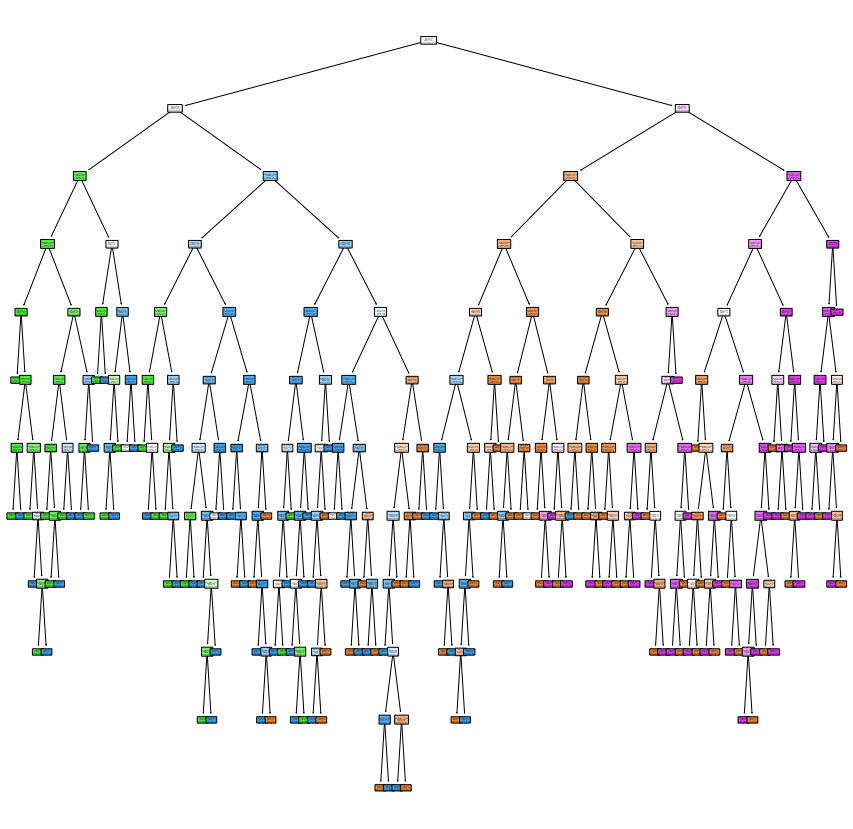

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = data.columns[:]
target_names = ["low cost", "medium cost", "high cost", "very high cost"]
arbol = DecisionTreeClassifier(criterion = "entropy",min_samples_split = 3,random_state = 40)
arbol.fit(X,y)

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(arbol, filled=True, feature_names=features, class_names=target_names, rounded=True)
plt.show()

Podemos ver el arbol a continuación, aunque no consegui encontrar la forma para solo pintar los primeros niveles

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [58]:
train_accuracy =[]
test_accuracy = []

max_depths = range (2,10)
for md in max_depths:
    arbol = DecisionTreeClassifier(criterion = "entropy",max_depth = md,min_samples_split = 3,random_state = 40)
    arbol.fit(X,y)
    
    scores = cross_validate(arbol, data, target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score'])) 

train_accuracy, test_accuracy
    

([0.7638333333333334,
  0.7649999999999999,
  0.8155555555555555,
  0.8753333333333334,
  0.9132222222222222,
  0.9521111111111111,
  0.9798888888888888,
  0.9920555555555556],
 [0.758,
  0.756,
  0.7830000000000001,
  0.834,
  0.8505,
  0.8494999999999999,
  0.8479999999999999,
  0.851])

###### Podemos observar que cuanto mayor es la profundidad, mayor es la precisión de ambos conjuntos, lo qué nos indiíca que al haber mayor numero de nodos hoja en el arbol, este podra ir refinando la clasificación poco a poco, pero tampoco queremos que el clsificador sobre aprenda de más, con lo cual deberiamos ser cuidadosos al fijarnos en que la precisión de entrenamiento no sea demasiado grande respecto a la de test

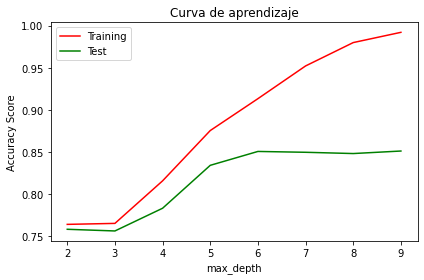

In [62]:
# Draw lines
plt.plot(max_depth, train_accuracy, color="r",  label="Training")
plt.plot(max_depth, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("max_depth"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Como podemos observar, la profundidad optima para el conjunto de test es de 6, con lo cual es la que usaremos para calcular la precisión ponderada media, la exhaustividad y la puntuación F1 en el siguiente apartado. A partir de la profundidad 6, el conjunto entrenamiento sobre aprende, con lo cual interesa quedarnos con la profundidad 6.

Vamos a dibujar el arbol con la profundidad optima:

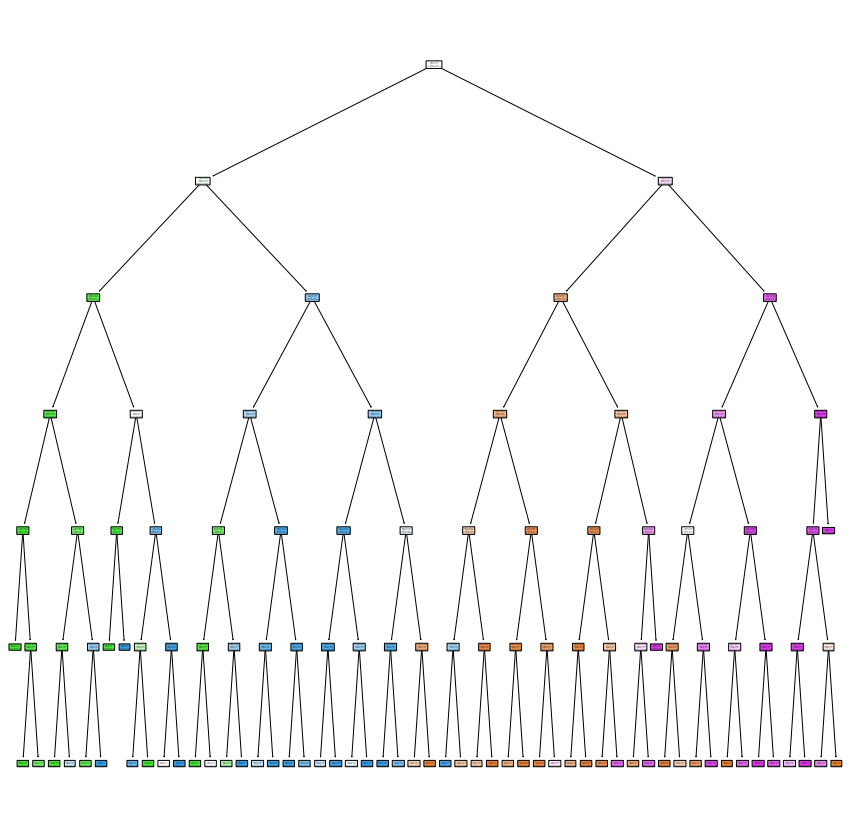

In [87]:
arbol = DecisionTreeClassifier(criterion = "entropy",max_depth = 6,min_samples_split = 3,random_state = 40)
arbol.fit(X,y)

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(arbol, filled=True, feature_names=phones["ram"], class_names=target_names, rounded=True)
plt.show()

In [80]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
arbol = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=3)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(arbol, data, target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8530066162041103
Exhaustividad ponderada media:  0.85
F1 ponderado media:  0.8504429857556076


## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
